In [2]:
import warnings
import time
import sys
import datetime
import joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

In [79]:
df_test = pd.read_csv('../Kaggle-data/processed/test_processed_clv&churn&ltv&change_ratio_RFE95.csv')

In [80]:
loaded_model = joblib.load('lightGBM_models.pkl')
print("モデルがロードされました。")

モデルがロードされました。


In [81]:
# lightgbm用
# X = df_test.drop(['first_active_month', 'card_id'], axis=1)
X = df_test
predictions = np.zeros(len(X))
for gbm in loaded_model:
    predictions += gbm.predict(X, num_iteration=gbm.best_iteration) / len(loaded_model)

df_test['target'] = predictions

In [82]:
df_test['target'].describe()

count    123623.000000
mean         -0.393198
std           1.172488
min         -15.842295
25%          -0.659036
50%          -0.194667
75%           0.162092
max           3.496528
Name: target, dtype: float64

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

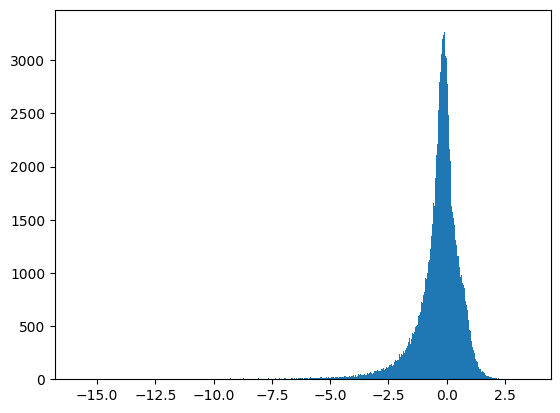

In [83]:
plt.hist(df_test['target'], bins='auto')

In [84]:
# PCA用
df_test_card_id = pd.read_csv('../Kaggle-data/processed/test_processed_clv&churn&ltv.csv')
df_test = pd.concat([df_test, df_test_card_id['card_id']], axis=1)

In [44]:
df_test

,new_purchase_amount_sum,auth_month_diff_mean,ratio_merchant_category_nu,total_date_max,history_month_diff_mean,new_purchase_month_mean,new_month_lag_mean_x,purchase_amount_sum_mean,auth_purchase_date_max,total_predicted_purchases,total_clv,hist_date_max,new_purchase_date_max,hist_predicted_purchases,auth_purchase_date_ptp,new_predicted_purchases,auth_category_1_sum,hist_clv,new_date_max,auth_category_1_mean,purchase_change_ratio_min,new_purchase_date_ptp,history_installments_sum,new_day_max,auth_purchase_month_std,history_category_1_sum,history_transactions_count,total_month_lag_mean,days_feature2,auth_month_lag_std,new_duration_max,auth_month_lag_mean,days_feature1,authorized_flag_mean,new_recency_rfm,new_day_min,purchase_amount_std_std,month_lag_std,hist_ratio_No,auth_purchase_date_min,ratio_amount_total,new_monetary_value,history_purchase_amount_min,days_feature2_ratio,new_purchase_amount_std,days_feature1_ratio,new_category_1_mean,history_month_lag_std,new_LTV,history_purchase_month_std,purchase_amount_max_mean,history_month_lag_mean,total_amount_median,history_purchase_amount_std,month_lag_mean,hist_month_lag_mean,history_purchase_amount_sum,auth_purchase_month_mean,new_T_rfm,purchase_amount_min_std,total_weekday_mean,hist_predicted_monetary_value,total_price_mean,new_amount_month_ratio_max,hist_amount_median,auth_merchant_id_nunique,new_purchase_date_min,history_purchase_month_mean,purchase_amount_sum_std,purchase_amount_std_mean,purchase_amount_min_mean,hist_duration,purchase_amount_count_mean,new_predicted_monetary_value,new_date_min,hist_weekday_mean,auth_category_2_1.0_mean,purchase_amount_mean_std,new_duration_min,history_purchase_amount_mean,days_feature3,history_installments_std,purchase_change_ratio_var,new_purchase_month_std,new_purchase_amount_max,purchase_change_ratio_max,new_amount_max,total_weekend_mean,hist_installments_sum,total_merchant_category_mode,history_purchase_amount_max,total_price_sum,hist_recency_rfm,installments_std_std,total_predicted_monetary_value,purchase_amount_count_std,purchase_amount_mean_mean,history_category_1_mean,total_frequency_rfm,new_weekday_mean,total_duration_min,hist_weekend_mean,hist_amount_month_ratio_min,auth_category_3_2.0_mean,new_price_sum,purchase_change_ratio_mean,city_id_purchase_amount_std,total_duration,new_duration_mean,hist_duration_min,hist_date_min,hist_merchant_category_mode,purchase_amount_max_std,new_merchant_category_mode,new_city_mode,new_category_3_2.0_mean,total_monetary_value,new_clv,history_category_3_2.0_mean,hist_price_max,auth_purchase_amount_sum,city_id_purchase_amount_max,hist_price_min,installments_purchase_amount_min,hist_frequency_rfm,elapsed_time,total_recency_rfm,total_installments_sum,hist_city_mode,hist_price_mean,installments_sum_mean,history_category_2_1.0_mean,city_id_purchase_amount_min,ratio_amount_mean,category_1_purchase_amount_min,new_purchase_month_max,installments_sum_std,new_amount_total,auth_installments_sum,total_LTV,auth_category_3_3.0_mean,history_installments_mean,hist_monetary_value,new_month_lag_mean_y,auth_purchase_amount_mean,new_price_min,new_category_1_sum,new_month_diff_mean,total_city_mode,installments_std_mean,auth_purchase_amount_std,new_amount_month_ratio_mean,hist_merchant_category_nu,total_merchant_category_nu,days_feature3_ratio,auth_transactions_count,new_price_max,hist_LTV,new_purchase_month_min,new_amount_month_ratio_min,installments_mean_std,installments_min_std,new_duration,new_amount_median,auth_purchase_amount_min,total_installments_mean,category_1_purchase_amount_std,total_frequency,category_1_installments_std,auth_merchant_category_id_nunique,history_month_lag_min,hist_installments_mean,installments_max_mean,hist_amount_total,auth_subsector_id_nunique,installments_max_std,history_merchant_category_id_nunique,total_amount_month_ratio_min,new_month_lag_std,new_price_mean,installments_purchase_amount_max,city_id_purchase_amount_mean,installments_purchase_amount_std,history_merchant_id_nunique,total_month_

In [85]:
df_test[['card_id', 'target']].to_csv('../Kaggle-data/submission/submission_0627-13-change_ratio_RFE-95-gbm.csv', index=False)

In [46]:
df_test.head(10)

,new_purchase_amount_sum,auth_month_diff_mean,ratio_merchant_category_nu,total_date_max,history_month_diff_mean,new_purchase_month_mean,new_month_lag_mean_x,purchase_amount_sum_mean,auth_purchase_date_max,total_predicted_purchases,total_clv,hist_date_max,new_purchase_date_max,hist_predicted_purchases,auth_purchase_date_ptp,new_predicted_purchases,auth_category_1_sum,hist_clv,new_date_max,auth_category_1_mean,purchase_change_ratio_min,new_purchase_date_ptp,history_installments_sum,new_day_max,auth_purchase_month_std,history_category_1_sum,history_transactions_count,total_month_lag_mean,days_feature2,auth_month_lag_std,new_duration_max,auth_month_lag_mean,days_feature1,authorized_flag_mean,new_recency_rfm,new_day_min,purchase_amount_std_std,month_lag_std,hist_ratio_No,auth_purchase_date_min,ratio_amount_total,new_monetary_value,history_purchase_amount_min,days_feature2_ratio,new_purchase_amount_std,days_feature1_ratio,new_category_1_mean,history_month_lag_std,new_LTV,history_purchase_month_std,purchase_amount_max_mean,history_month_lag_mean,total_amount_median,history_purchase_amount_std,month_lag_mean,hist_month_lag_mean,history_purchase_amount_sum,auth_purchase_month_mean,new_T_rfm,purchase_amount_min_std,total_weekday_mean,hist_predicted_monetary_value,total_price_mean,new_amount_month_ratio_max,hist_amount_median,auth_merchant_id_nunique,new_purchase_date_min,history_purchase_month_mean,purchase_amount_sum_std,purchase_amount_std_mean,purchase_amount_min_mean,hist_duration,purchase_amount_count_mean,new_predicted_monetary_value,new_date_min,hist_weekday_mean,auth_category_2_1.0_mean,purchase_amount_mean_std,new_duration_min,history_purchase_amount_mean,days_feature3,history_installments_std,purchase_change_ratio_var,new_purchase_month_std,new_purchase_amount_max,purchase_change_ratio_max,new_amount_max,total_weekend_mean,hist_installments_sum,total_merchant_category_mode,history_purchase_amount_max,total_price_sum,hist_recency_rfm,installments_std_std,total_predicted_monetary_value,purchase_amount_count_std,purchase_amount_mean_mean,history_category_1_mean,total_frequency_rfm,new_weekday_mean,total_duration_min,hist_weekend_mean,hist_amount_month_ratio_min,auth_category_3_2.0_mean,new_price_sum,purchase_change_ratio_mean,city_id_purchase_amount_std,total_duration,new_duration_mean,hist_duration_min,hist_date_min,hist_merchant_category_mode,purchase_amount_max_std,new_merchant_category_mode,new_city_mode,new_category_3_2.0_mean,total_monetary_value,new_clv,history_category_3_2.0_mean,hist_price_max,auth_purchase_amount_sum,city_id_purchase_amount_max,hist_price_min,installments_purchase_amount_min,hist_frequency_rfm,elapsed_time,total_recency_rfm,total_installments_sum,hist_city_mode,hist_price_mean,installments_sum_mean,history_category_2_1.0_mean,city_id_purchase_amount_min,ratio_amount_mean,category_1_purchase_amount_min,new_purchase_month_max,installments_sum_std,new_amount_total,auth_installments_sum,total_LTV,auth_category_3_3.0_mean,history_installments_mean,hist_monetary_value,new_month_lag_mean_y,auth_purchase_amount_mean,new_price_min,new_category_1_sum,new_month_diff_mean,total_city_mode,installments_std_mean,auth_purchase_amount_std,new_amount_month_ratio_mean,hist_merchant_category_nu,total_merchant_category_nu,days_feature3_ratio,auth_transactions_count,new_price_max,hist_LTV,new_purchase_month_min,new_amount_month_ratio_min,installments_mean_std,installments_min_std,new_duration,new_amount_median,auth_purchase_amount_min,total_installments_mean,category_1_purchase_amount_std,total_frequency,category_1_installments_std,auth_merchant_category_id_nunique,history_month_lag_min,hist_installments_mean,installments_max_mean,hist_amount_total,auth_subsector_id_nunique,installments_max_std,history_merchant_category_id_nunique,total_amount_month_ratio_min,new_month_lag_std,new_price_mean,installments_purchase_amount_max,city_id_purchase_amount_mean,installments_purchase_amount_std,history_merchant_id_nunique,total_month_

In [48]:
X = df_test.drop(['first_active_month', 'card_id'], axis=1)

# ロードしたモデルで予測を行う
y_pred = loaded_model.predict(X)

scaler_for_train = joblib.load('scaler_for_train.pkl')

# 予測結果をデータフレームに追加
y_pred_original = scaler_for_train.inverse_transform(y_pred.reshape(-1, 1))
df_test['target'] = y_pred_original
# df_test['target'] = y_pred

KeyError: "['first_active_month'] not found in axis"

In [14]:
y_pred

array([0.62364217, 0.64979572, 0.65232941, ..., 0.65100611, 0.63341449,
       0.64250016])

In [15]:
y_pred_original

array([[-1.29856235],
       [ 0.04009043],
       [ 0.16977534],
       ...,
       [ 0.10204318],
       [-0.79837258],
       [-0.33332854]])

In [16]:
y_pred.shape

(123623,)

In [17]:
y_pred_original

array([[-1.29856235],
       [ 0.04009043],
       [ 0.16977534],
       ...,
       [ 0.10204318],
       [-0.79837258],
       [-0.33332854]])

In [18]:
df_test.describe()

,first_active_month,feature_1,feature_2,feature_3,elapsed_time,quarter,days_feature1,days_feature2,days_feature3,days_feature1_ratio,days_feature2_ratio,days_feature3_ratio,feature_sum,feature_product,feature_mean,feature_max,feature_min,feature_var,authorized_ratio,cat_1_mean,installments_mean,installments_max,installments_min,month_lag_mean,month_lag_max,month_lag_min,purchase_amount_mean,purchase_amount_max,purchase_amount_min,cat_2_1_mean,cat_2_2_mean,cat_2_3_mean,cat_2_4_mean,cat_2_5_mean,cat_3_A_mean,cat_3_B_mean,cat_3_C_mean,purchase_freq,state_minus1count,state_1count,state_2count,state_3count,state_4count,state_5count,state_6count,state_7count,state_8count,state_9count,state_10count,state_11count,state_12count,state_13count,state_14count,state_15count,state_16count,state_17count,state_18count,state_19count,state_20count,state_21count,state_22count,state_23count,state_24count,target
count,123622,123623.000000,123623.000000,123623.000000,123622.000000,123622.000000,123622.000000,123622.000000,123622.000000,123622.000000,123622.000000,123622.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000,123623.000000
mean,2017-01-15 21:11:17.762857728,0.527315,0.370898,0.564377,0.155400,0.594794,0.154330,0.099093,0.106570,0.080932,0.075687,0.074491,0.569239,0.358817,0.569239,0.545598,0.564377,0.485688,0.897136,0.096641,0.088344,0.324497,0.087304,0.640699,0.965677,0.426016,0.000139,0.000276,0.002903,0.494002,0.036132,0.151279,0.077481,0.122641,0.466249,0.412461,0.107575,0.016785,0.001534,0.000962,0.001640,0.001441,0.002689,0.003802,0.000076,0.002542,0.000688,0.021074,0.000743,0.001459,0.001223,0.002275,0.000877,0.006986,0.005857,0.000802,0.001282,0.003955,0.002819,0.003256,0.002863,0.001003,0.000835,-0.282268
min,2011-11-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.722798
25%,2016-10-01 00:00:00,0.250000,0.000000,0.000000,0.054150,0.333333,0.051590,0.031793,0.000000,0.028629,0.029378,0.000000,0.333333,0.000000,0.333333,0.250000,0.000000,0.244017,0.858974,0.000000,0.019643,0.083333,0.000000,0.512456,0.916667,0.083333,0.000015,0.000003,0.000619,0.052632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.359381
50%,2017-04-01 00:00:00,0.500000,0.500000,1.000000,0.122059,0.666667,0.107189,0.063586,0.053853,0.055589,0.047881,0.036300,0.500000,0.300000,0.500000,0.500000,1.000000,0.333333,0.929487,0.000000,0.101600,0.166667,0.090909,0.659936,1.000000,0.416667,0.000027,0.000007,0.001238,0.428571,0.000000,0.000000,0.000000,0.000000,0.008621,0.333333,0.010101,0.010394,0.000179,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [19]:
df_test[['card_id', 'target']].to_csv('../Kaggle-data/submission/submission_0625-2.csv', index=False)